In [31]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
# from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',200)

In [87]:
from sklearn.svm import SVR

# --- short period ---

In [32]:
# date period
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2016-03-01')

# get data from yahoo through pandas_datareader
spy = pdr.data.get_data_yahoo('SPY', start_date, end_date)
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,93.675278
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.923241
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.989357
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.386139
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,94.700218


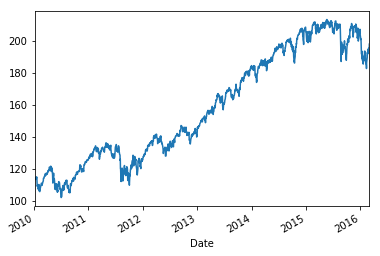

In [33]:
spy.Close.plot()

In [40]:
spy['daily change'] = spy.Close - spy.Open
spy['daily change'].sum()

43.36016845703125

In [41]:
spy['overnight change'] = spy.Open - spy.Close.shift(1)
spy['overnight change'].sum()

42.37982940673828

In [42]:
np.std(spy['daily change'])

1.1464625384613436

In [43]:
np.std(spy['overnight change'])

0.9535898434673087

In [46]:
# negative mean
spy[spy['daily change']<0]['daily change'].mean()

-0.905834890069394

In [47]:
spy[spy['overnight change']<0]['overnight change'].mean()

-0.6649585617913141

In [50]:
t_re = spy.Close/spy.Close.shift(1) - 1
d_re = spy.Close/spy.Open - 1
n_re = spy.Open/spy.Close.shift(1) - 1

In [57]:
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
          '\nWins:', wins,\
          '\nLosses:', losses,\
          '\nBreakeven:', evens,\
          '\nWin/Loss Ratio', win_r,\
          '\nMean Win:', mean_w,\
          '\nMean Loss:', mean_l,\
          '\nMean', mean_trd,\
          '\nStd Dev:', sd,\
          '\nMax Loss:', max_l,\
          '\nMax Win:', max_w,\
          '\nSharpe Ratio:', sharpe_r)

In [58]:
get_stats(t_re)

Trades: 1549 
Wins: 844 
Losses: 699 
Breakeven: 6 
Win/Loss Ratio 1.207 
Mean Win: 0.007 
Mean Loss: -0.007 
Mean 0.0 
Std Dev: 0.01 
Max Loss: -0.065 
Max Win: 0.046 
Sharpe Ratio: 0.6477


In [59]:
get_stats(d_re)

Trades: 1550 
Wins: 851 
Losses: 689 
Breakeven: 10 
Win/Loss Ratio 1.235 
Mean Win: 0.005 
Mean Loss: -0.006 
Mean 0.0 
Std Dev: 0.008 
Max Loss: -0.042 
Max Win: 0.037 
Sharpe Ratio: 0.4472


In [60]:
get_stats(n_re)

Trades: 1549 
Wins: 821 
Losses: 720 
Breakeven: 8 
Win/Loss Ratio 1.14 
Mean Win: 0.004 
Mean Loss: -0.004 
Mean 0.0 
Std Dev: 0.006 
Max Loss: -0.052 
Max Win: 0.041 
Sharpe Ratio: 0.5071


# --- longer period --- 

In [61]:
# date period
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2016-03-01')

# get data from yahoo through pandas_datareader
spy = pdr.data.get_data_yahoo('SPY', start_date, end_date)
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,100.934494
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,96.987312
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,97.160843
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,95.599319
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,101.151367


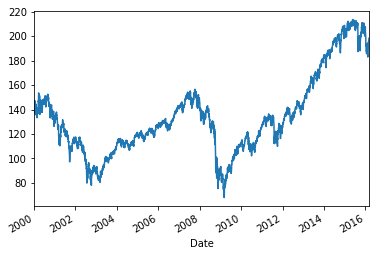

In [63]:
spy.Close.plot()

In [64]:
t_re = spy.Close/spy.Close.shift(1) - 1
d_re = spy.Close/spy.Open - 1
n_re = spy.Open/spy.Close.shift(1) - 1

In [65]:
(spy['Close'] - spy['Close'].shift(1)).sum()

52.67250061035156

In [66]:
(spy['Close'] - spy['Open']).sum()

-36.91032409667969

In [68]:
(spy['Open'] - spy['Close'].shift(1)).sum()

86.77032470703125

In [69]:
get_stats(t_re)

Trades: 4064 
Wins: 2168 
Losses: 1881 
Breakeven: 15 
Win/Loss Ratio 1.153 
Mean Win: 0.008 
Mean Loss: -0.009 
Mean 0.0 
Std Dev: 0.013 
Max Loss: -0.098 
Max Win: 0.145 
Sharpe Ratio: 0.1958


In [70]:
get_stats(d_re)

Trades: 4065 
Wins: 2128 
Losses: 1908 
Breakeven: 29 
Win/Loss Ratio 1.115 
Mean Win: 0.007 
Mean Loss: -0.008 
Mean -0.0 
Std Dev: 0.011 
Max Loss: -0.09 
Max Win: 0.084 
Sharpe Ratio: -0.0063


In [71]:
get_stats(n_re)

Trades: 4064 
Wins: 2152 
Losses: 1878 
Breakeven: 34 
Win/Loss Ratio 1.146 
Mean Win: 0.004 
Mean Loss: -0.005 
Mean 0.0 
Std Dev: 0.007 
Max Loss: -0.083 
Max Win: 0.061 
Sharpe Ratio: 0.3541


# --- SVM ---

In [75]:
# last 20 Close
for i in range(1, 21, 1):
    spy.loc[:,'Close Minus ' + str(i)] = spy['Close'].shift(i)

In [86]:
# Close, delete NA rows
spy20 = spy[[x for x in spy.columns if 'Close Minus' in x or x == 'Close']].iloc[20:,]
# -20, -19, ... , Close
spy20 = spy20.iloc[:,::-1]
spy20.head()

,Close Minus 20,Close Minus 19,Close Minus 18,Close Minus 17,Close Minus 16,Close Minus 15,Close Minus 14,Close Minus 13,Close Minus 12,Close Minus 11,...,Close Minus 9,Close Minus 8,Close Minus 7,Close Minus 6,Close Minus 5,Close Minus 4,Close Minus 3,Close Minus 2,Close Minus 1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,145.4375,139.75,140.00,137.7500,145.7500,146.25000,144.50000,143.06250,145.00000,146.96875,...,147.00000,144.75000,144.43750,140.34375,141.9375,140.8125,140.2500,135.8750,139.56250,140.93750
2000-02-02,139.7500,140.00,137.75,145.7500,146.2500,144.50000,143.06250,145.00000,146.96875,145.81250,...,144.75000,144.43750,140.34375,141.93750,140.8125,140.2500,135.8750,139.5625,140.93750,141.06250
2000-02-03,140.0000,137.75,145.75,146.2500,144.5000,143.06250,145.00000,146.96875,145.81250,147.00000,...,144.43750,140.34375,141.93750,140.81250,140.2500,135.8750,139.5625,140.9375,141.06250,143.18750
2000-02-04,137.7500,145.75,146.25,144.5000,143.0625,145.00000,146.96875,145.81250,147.00000,144.75000,...,140.34375,141.93750,140.81250,140.25000,135.8750,139.5625,140.9375,141.0625,143.18750,142.59375
2000-02-07,145.7500,146.25,144.50,143.0625,145.0000,146.96875,145.81250,147.00000,144.75000,144.43750,...,141.93750,140.81250,140.25000,135.87500,139.5625,140.9375,141.0625,143.1875,142.59375,142.37500


In [88]:
# "sklearn" package
clf = SVR(kernel='linear')

In [89]:
len(spy20)

4045

In [99]:
X_train = spy20[:-1000]
# y is tomorrow's close
y_train = spy20['Close'].shift(-1)[:-1000]

In [100]:
X_test = spy20[-1000:]
y_test = spy20['Close'].shift(-1)[-1000:]

# --- SVM training ---

In [101]:
model = clf.fit(X_train, y_train)

In [102]:
predicts = model.predict(X_test)

In [141]:
tf = pd.DataFrame(list(zip(y_test, predicts)), columns=['Close', 'Predict'], index=y_test.index)
tf.head()

,Close,Predict
Date,,
2012-03-09,137.580002,137.684409
2012-03-12,140.059998,137.927134
2012-03-13,139.910004,139.910895
2012-03-14,140.720001,139.923058
2012-03-15,140.300003,140.687120


In [142]:
cdc = spy[['Close']].iloc[-1000:]
ndo = spy[['Open']].iloc[-1000:].shift(-1)

In [143]:
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']
tf2.head()

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2012-03-09,137.580002,137.684409,137.570007,137.550003
2012-03-12,140.059998,137.927134,137.580002,138.320007
2012-03-13,139.910004,139.910895,140.059998,140.100006
2012-03-14,140.720001,139.923058,139.910004,140.119995
2012-03-15,140.300003,140.687120,140.720001,140.360001


In [144]:
tf2['signal'] = (tf2['Predicted Next Close'] > tf2['Next Day Open'])*1
tf2.head()

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,signal
Date,,,,,
2012-03-09,137.580002,137.684409,137.570007,137.550003,1
2012-03-12,140.059998,137.927134,137.580002,138.320007,0
2012-03-13,139.910004,139.910895,140.059998,140.100006,0
2012-03-14,140.720001,139.923058,139.910004,140.119995,0
2012-03-15,140.300003,140.687120,140.720001,140.360001,1


In [145]:
tf2['PnL'] = tf2.signal*(tf2['Next Day Close']/tf2['Next Day Open']-1)*100
tf2.head()

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,signal,PnL
Date,,,,,,
2012-03-09,137.580002,137.684409,137.570007,137.550003,1,0.021809
2012-03-12,140.059998,137.927134,137.580002,138.320007,0,0.000000
2012-03-13,139.910004,139.910895,140.059998,140.100006,0,-0.000000
2012-03-14,140.720001,139.923058,139.910004,140.119995,0,0.000000
2012-03-15,140.300003,140.687120,140.720001,140.360001,1,-0.042745


In [146]:
tf2.PnL.sum()

2.9784477857968903

In [147]:
(spy.Close-spy.Open).iloc[-1000:].sum()

30.560203552246094

In [148]:
get_stats(tf2.PnL)

Trades: 999 
Wins: 259 
Losses: 231 
Breakeven: 509 
Win/Loss Ratio 1.121 
Mean Win: 0.467 
Mean Loss: -0.511 
Mean 0.003 
Std Dev: 0.455 
Max Loss: -2.135 
Max Win: 2.756 
Sharpe Ratio: 0.104


In [149]:
get_stats((spy.Open/spy.Close-1).iloc[-1000:])

Trades: 1000 
Wins: 448 
Losses: 546 
Breakeven: 6 
Win/Loss Ratio 0.821 
Mean Win: 0.005 
Mean Loss: -0.005 
Mean -0.0 
Std Dev: 0.007 
Max Loss: -0.027 
Max Win: 0.044 
Sharpe Ratio: -0.3952


In [150]:
tf2['signal1'] = (tf2['Predicted Next Close'] > (tf2['Next Day Open']+1))*1

In [154]:
tf2['PnL1'] = tf2.signal1*(tf2['Next Day Close']/tf2['Next Day Open']-1)*100

In [155]:
tf2.PnL1.sum()

-1.8467958028563158

In [156]:
get_stats(tf2.PnL1)

Trades: 999 
Wins: 56 
Losses: 50 
Breakeven: 893 
Win/Loss Ratio 1.12 
Mean Win: 0.572 
Mean Loss: -0.678 
Mean -0.002 
Std Dev: 0.256 
Max Loss: -1.966 
Max Win: 2.756 
Sharpe Ratio: -0.1145


In [158]:
tf2['signal2'] = (tf2['Predicted Next Close'] < (tf2['Next Day Open']+1))*1

In [159]:
tf2['PnL2'] = tf2.signal2*(tf2['Next Day Close']/tf2['Next Day Open']-1)*100

In [160]:
tf2.PnL2.sum()

22.38914293319532

In [161]:
get_stats(tf2.PnL2)

Trades: 999 
Wins: 489 
Losses: 398 
Breakeven: 112 
Win/Loss Ratio 1.229 
Mean Win: 0.446 
Mean Loss: -0.491 
Mean 0.022 
Std Dev: 0.605 
Max Loss: -4.175 
Max Win: 1.969 
Sharpe Ratio: 0.5885


# --- change the train and test period ---

In [164]:
X_train = spy20[:-2000]
y_train = spy20['Close'].shift(-1)[:-2000]
X_test = spy20[-2000:-1000]
y_test = spy20['Close'].shift(-1)[-2000:-1000]

In [165]:
model = clf.fit(X_train, y_train)
predicts = model.predict(X_test)
tf = pd.DataFrame(list(zip(y_test, predicts)), columns=['Close', 'Predict'], index=y_test.index)

In [166]:
cdc = spy[['Close']].iloc[-2000:-1000]
ndo = spy[['Open']].iloc[-2000:-1000].shift(-1)
tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

In [167]:
tf2['signal'] = (tf2['Predicted Next Close'] < (tf2['Next Day Open']+1))*1
tf2['PnL'] = tf2.signal*(tf2['Next Day Close']/tf2['Next Day Open']-1)*100
tf2.PnL.sum()

33.2933465994514

In [168]:
get_stats(tf2.PnL)

Trades: 999 
Wins: 468 
Losses: 389 
Breakeven: 142 
Win/Loss Ratio 1.203 
Mean Win: 0.771 
Mean Loss: -0.842 
Mean 0.033 
Std Dev: 1.111 
Max Loss: -8.991 
Max Win: 7.968 
Sharpe Ratio: 0.4763


In [169]:
(spy.Close-spy.Open).iloc[-2000:-1000].sum()

-7.090003967285156

# --- another model ---

In [170]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [171]:
def dtw_dist(x, y):
    distance, path = fastdtw(x, y, dist=euclidean)
    return distance

In [172]:
tseries = []
tlen = 5
for i in range(tlen, len(spy), tlen):
    pctc = spy['Close'].iloc[i-tlen:i].pct_change()[1:].values * 100
    res = spy['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))

In [173]:
len(tseries)

812

In [174]:
tseries[0]

(array([-3.91061453,  0.17889088, -1.60714286,  5.8076225 ]),
 0.34305317324185847)

In [175]:
dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))

In [176]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])

In [177]:
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)

In [178]:
sfe = sf[sf['A']<sf['B']]

In [179]:
winf = sfe[(sfe['Dist']<=1)&(sfe['A Ret']>0)]

In [183]:
winf.head()

,A,B,Dist,A Ret,B Ret
3312,4,69,0.778630,1.360843,-1.696072
3439,4,196,0.608312,1.360843,0.410596
3609,4,366,0.973128,1.360843,0.040522
3790,4,547,0.832545,1.360843,-1.447712
3891,4,648,0.548848,1.360843,-0.510458


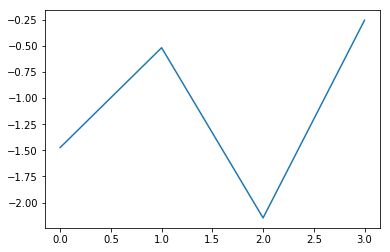

In [184]:
plt.plot(np.arange(4), tseries[6][0])

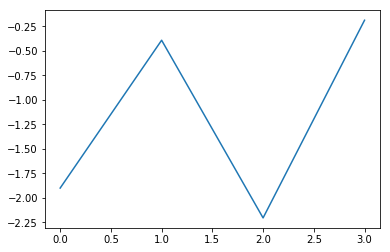

In [185]:
plt.plot(np.arange(4), tseries[598][0])

In [186]:
excluded = {}
return_list = []
def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})

In [187]:
winf.apply(get_returns, axis=1);

In [188]:
get_stats(pd.Series(return_list))

Trades: 569 
Wins: 352 
Losses: 217 
Breakeven: 0 
Win/Loss Ratio 1.622 
Mean Win: 0.572 
Mean Loss: -0.646 
Mean 0.108 
Std Dev: 0.818 
Max Loss: -2.999 
Max Win: 3.454 
Sharpe Ratio: 2.0877
